In [160]:
#Realizamos la carga de las librerias
import pandas as pd 
import numpy as np # 
import seaborn as sns 
import matplotlib.pyplot as plt 

# carga de librerias del modelo de regresíon logistica
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [161]:
Datos = pd.read_csv('C:\\Users\\usuario\\Desktop\\Dataset 5\\Titanic-Dataset.csv')

In [162]:
Datos.head(300)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C
296,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,NaN,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S


In [163]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

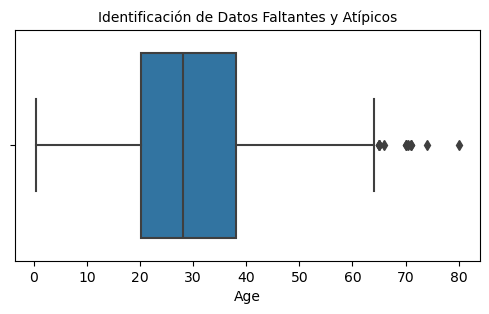

In [164]:
#Identificación de Datos Faltantes y Atípicos en la variable age

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )


In [165]:
for column in Datos.columns:
    null_values = Datos[column].isnull().sum()  # Verifica los valores nulos en la columna
    print("Cantidad de valores nulos en {}: {}".format(column, null_values))

Cantidad de valores nulos en PassengerId: 0
Cantidad de valores nulos en Survived: 0
Cantidad de valores nulos en Pclass: 0
Cantidad de valores nulos en Name: 0
Cantidad de valores nulos en Sex: 0
Cantidad de valores nulos en Age: 177
Cantidad de valores nulos en SibSp: 0
Cantidad de valores nulos en Parch: 0
Cantidad de valores nulos en Ticket: 0
Cantidad de valores nulos en Fare: 0
Cantidad de valores nulos en Cabin: 687
Cantidad de valores nulos en Embarked: 2


In [166]:
Datos = Datos.fillna(method='ffill')

C:\Users\usuario\AppData\Local\Temp\ipykernel_21444\2634709941.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Datos = Datos.fillna(method='ffill')


In [167]:
for column in Datos.columns:
    null_values = Datos[column].isnull().sum()  # Verifica los valores nulos en la columna
    print("Cantidad de valores nulos en {}: {}".format(column, null_values))

Cantidad de valores nulos en PassengerId: 0
Cantidad de valores nulos en Survived: 0
Cantidad de valores nulos en Pclass: 0
Cantidad de valores nulos en Name: 0
Cantidad de valores nulos en Sex: 0
Cantidad de valores nulos en Age: 0
Cantidad de valores nulos en SibSp: 0
Cantidad de valores nulos en Parch: 0
Cantidad de valores nulos en Ticket: 0
Cantidad de valores nulos en Fare: 0
Cantidad de valores nulos en Cabin: 1
Cantidad de valores nulos en Embarked: 0


In [168]:
Datos.drop(columns=['Name'], inplace=True)
Datos.drop(columns=['Embarked'], inplace=True)
Datos.drop(columns=['Cabin'], inplace=True)
Datos.drop(columns=['Ticket'], inplace=True)

Datos = pd.get_dummies(Datos, columns=['Sex'], drop_first=True)


In [169]:
# Total de personas con condicion cardiaca especial

Datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [170]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    bool   
dtypes: bool(1), float64(2), int64(5)
memory usage: 49.7 KB


In [171]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna condición
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna condición

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [172]:
Datos[['Survived']].head(10)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [173]:
print (X_train)

     PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_male
671          672       1  31.0      1      0  52.0000      True
417          418       2  18.0      0      2  13.0000     False
634          635       3   9.0      3      2  27.9000     False
323          324       2  22.0      1      1  29.0000     False
379          380       3  19.0      0      0   7.7750      True
..           ...     ...   ...    ...    ...      ...       ...
131          132       3  20.0      0      0   7.0500      True
490          491       3   9.0      1      0  19.9667      True
528          529       3  39.0      0      0   7.9250      True
48            49       3  19.0      2      0  21.6792      True
80            81       3  22.0      0      0   9.0000      True

[668 rows x 7 columns]


In [174]:
print (Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


In [176]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [177]:
print (Prediccion)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0]


In [178]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       137
           1       0.76      0.63      0.69        86

    accuracy                           0.78       223
   macro avg       0.78      0.75      0.76       223
weighted avg       0.78      0.78      0.78       223



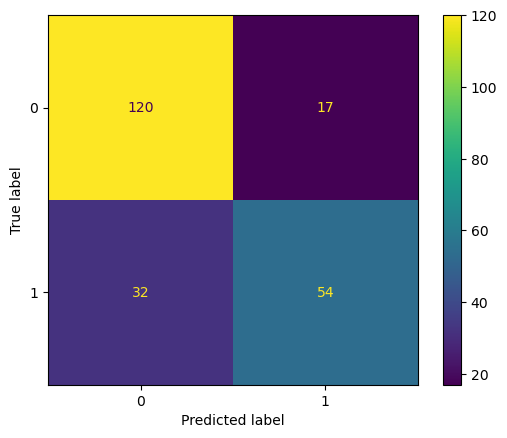

In [179]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

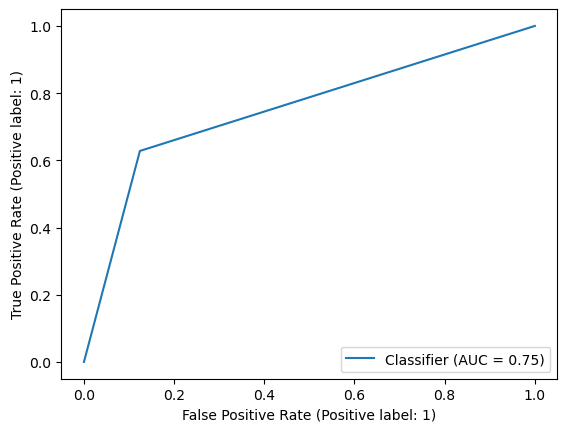

In [180]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()